In [41]:
%pylab inline
import pandas

Populating the interactive namespace from numpy and matplotlib


In [33]:
import seaborn

In [38]:
import matplotlib

# Load CSV

In [8]:
data = pandas.read_csv(r'C:\Users\Student Assistant\Downloads/Uber.csv')

In [26]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11,40.7690,-73.9549,B02512
1,4/1/2014 0:17,40.7267,-74.0345,B02512
2,4/1/2014 0:21,40.7316,-73.9873,B02512
3,4/1/2014 0:28,40.7588,-73.9776,B02512
4,4/1/2014 0:33,40.7594,-73.9722,B02512


# Convert datetime and add some useful columns

In [10]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [42]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [26]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [27]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [28]:
def get_weekday(dt):
    return dt.weekday()
data['weekday'] = data['Date/Time'].map(get_weekday)

In [29]:
def get_hour(dt):
    return dt.hour
data['hour'] = data['Date/Time'].map(get_hour)

In [30]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysing Date of Month

Text(0.5, 1.0, 'Frequency By Date of Month Uber Apr 2014')

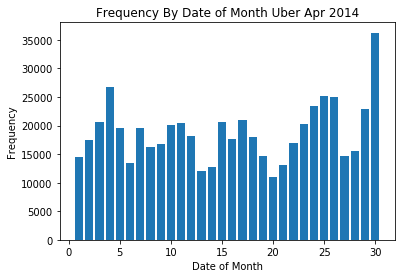

In [43]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5,30.5))
xlabel('Date of Month')
ylabel('Frequency')
title('Frequency By Date of Month Uber Apr 2014')

In [45]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [46]:
sort_by_date = by_date.sort_values()
sort_by_date

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

Text(0.5, 1.0, 'Frequency by Date of Month Uber Apr 2014')

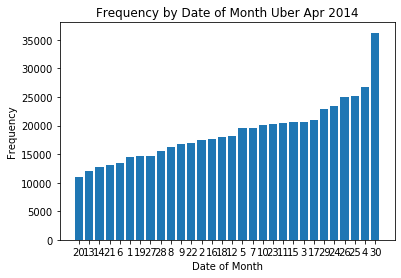

In [47]:
bar(range(1,31),sort_by_date)
xticks(range(1,31), sort_by_date.index)
xlabel('Date of Month')
ylabel('Frequency')
title('Frequency by Date of Month Uber Apr 2014')

# Analysing Hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

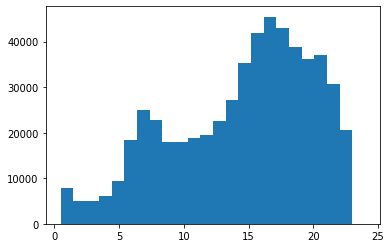

In [48]:
hist(data.hour, bins = 24, range=(.5,24))

# Analysing Weekday

([<matplotlib.axis.XTick at 0x21b01aec400>,
 <a list of 7 Text xticklabel objects>)

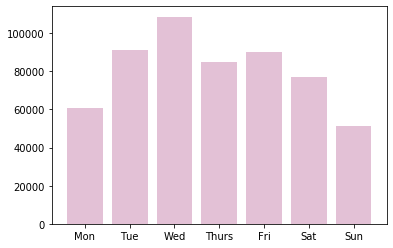

In [53]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color = '#BB6699',alpha=.4)
xticks(range(7), 'Mon Tue Wed Thurs Fri Sat Sun'.split())

# Cross Analysis (Hour vs Day of Week)

In [54]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

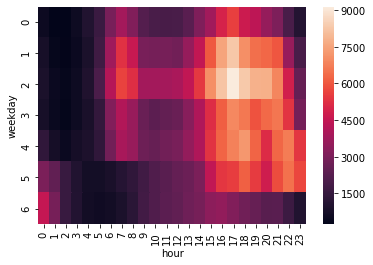

In [55]:
seaborn.heatmap(by_cross)